In [3]:
import pandas 
import matplotlib as plt

In [4]:
from pandas import read_csv

data = pandas.read_csv(r'C:\Users\Tomi\Documents\DiploDatos\Mentoria\serie_log.csv',
                       index_col=0, parse_dates=True, dayfirst=True)

data.head()

# Data es el logaritmo del valor de los indices 

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN,Year,Month,Weekday
FECHA,,,,,,,,,,,,,,
1997-07-02,6.714504,9.418606,6.806863,6.883391,8.977220,8.375751,8.091117,5.172511,7.587500,4.970511,4.796275,1997,7,Wednesday
1997-07-03,6.723759,9.419469,6.821020,6.894184,9.006794,8.395939,8.102216,5.178089,7.572529,4.929226,4.794143,1997,7,Thursday
1997-07-04,6.731459,9.047596,6.819701,6.895324,9.038176,8.396646,8.100296,5.169943,7.553691,4.908267,4.787493,1997,7,Friday
1997-07-07,6.735612,9.435578,6.815859,6.898755,9.001550,8.410534,8.104428,5.164795,7.559571,4.881292,4.785874,1997,7,Monday
1997-07-08,6.741009,9.443040,6.823014,6.913548,8.991528,8.413088,8.094231,5.170894,7.554989,4.892927,4.789907,1997,7,Tuesday


### Walk Forward Validation

In [5]:
from matplotlib import pyplot

X = data.values
n_train = 1050
n_records = len(X)
#for i in range(n_train, n_records):
    #train, test = X[0:i], X[i:i+1]
    #print('train=%d, test=%d' % (len(train), len(test)))

### Test-Train Split

In [6]:
from matplotlib import pyplot
from sklearn.model_selection import TimeSeriesSplit

X = data.values
splits = TimeSeriesSplit(n_splits=6, max_train_size = None)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
	#pyplot.subplot(310 + index)
	#pyplot.plot(train)
	#pyplot.plot([None for i in train] + [x for x in test])
	#index += 1
#pyplot.show()


# Hay un problema con los graficos cuando lo hago con mas de 3 splits

Observations: 1708
Training Observations: 857
Testing Observations: 851
Observations: 2559
Training Observations: 1708
Testing Observations: 851
Observations: 3410
Training Observations: 2559
Testing Observations: 851
Observations: 4261
Training Observations: 3410
Testing Observations: 851
Observations: 5112
Training Observations: 4261
Testing Observations: 851
Observations: 5963
Training Observations: 5112
Testing Observations: 851


<Figure size 432x288 with 0 Axes>

## Baseline Prediction: Average Forecast sobre los rendimientos diarios

In [7]:
from pandas import read_csv

rend_diario = pandas.read_csv(r'C:\Users\Tomi\Documents\DiploDatos\Mentoria\rend_diario.csv',
                       index_col=0, parse_dates=True, dayfirst=True)

rend_diario.head()

,Year,Weekday,MERV_diario,BVSP_diario,GSPC_diario,NDX_diario,FTSE_diario,GDAXI_diario,FCHI_diario,N225_diario,HSI_diario,SSEC_diario,BSESN_diario
FECHA,,,,,,,,,,,,,
1997-07-02,1997,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-03,1997,Thursday,0.929826,0.086285,1.425833,1.085122,3.001574,2.039279,1.116075,0.559379,-1.485951,-4.044444,-0.213017
1997-07-04,1997,Friday,0.772897,-31.055785,-0.131839,0.114093,3.187888,0.070745,-0.191773,-0.811322,-1.866134,-2.074027,-0.662731
1997-07-07,1997,Monday,0.416186,47.400318,-0.383430,0.343687,-3.596321,1.398478,0.414040,-0.513522,0.589664,-2.661495,-0.161848
1997-07-08,1997,Tuesday,0.541217,0.748911,0.718043,1.490356,-0.997135,0.255689,-1.014525,0.611764,-0.457160,1.170353,0.404193


In [8]:
rend_diario.shape

(5963, 13)

In [9]:
merval = rend_diario.iloc[1:5963,2]
merval

FECHA
1997-07-03    0.929826
1997-07-04    0.772897
1997-07-07    0.416186
1997-07-08    0.541217
1997-07-09   -0.031313
                ...   
2020-05-04   -2.619989
2020-05-05    3.579307
2020-05-06    0.007127
2020-05-07    4.951333
2020-05-08    0.930783
Name: MERV_diario, Length: 5962, dtype: float64

In [10]:
X = merval.values
X

array([0.92982646, 0.77289679, 0.41618622, ..., 0.00712715, 4.95133267,
       0.93078253])

In [11]:
X = merval.values
window = 15
obs = len(merval)

# Este es el average forecast (en cada prediccion agrega un nuevo valor sin dropear ningun otro)
average_forecast = []
for i in range(window, obs):
    average_forecast.append((X[0:i].mean(), X[i:i+1]))

In [12]:
# si se quiere visualizar el average forecaste en tiempo real descomentar las siguientes lineas:

#for prediccion,real in average_forecast:
    #print(f"el valor predecido fue {prediccion}  mientras que el valor real era {real}")


In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error

predicciones = np.array([pred for pred, _ in average_forecast])
reales = np.array([real for _, real in average_forecast])

# ERROR CUADRATICO MEDIO DEL AVERAGE FORECAST:

Error_cuadratico = mean_squared_error(reales, predicciones)
print(Error_cuadratico)

20.342311061570722


## Baseline Prediction: Average Forecast con sliding window sobre los rendimientos diarios

In [14]:
import more_itertools

ventanas = np.array(list(more_itertools.windowed(X,n=15, step=1))) # me quedan conformadas 5960 ventanas

# tengo que descartar la ultima ventana porque si la dejo esa ventana no va a tener ningun valor de test con el cual 
# comparar su promedio, entonces elimino la ultima ventana

ventanas = np.delete(ventanas, -1, axis=0)
len(ventanas), len(reales)


(5947, 5947)

In [15]:
promedio_movil = []
for i in ventanas:
    promedio_movil.append(i.mean())

# en promedio_movil estan todas las predicciones de un average forecast con sliding window

In [16]:
# ERROR CUADRATICO MEDIO DEL AVERAGE FORECAST CON SLIDING WINDOW:

Error_cuadratico_sw = mean_squared_error(reales, promedio_movil)
print(Error_cuadratico_sw)

21.61784410746444


## Modelo ARMA sobre los rendimientos diarios

Lo que se hace ahora es aplicar un Modelo ARMA sobre los rendimientos diarios. Se hace porque estamos interesados en saber si este modelo ARMA es mejor que el modelo baseline que acabamos de aplicar, es decir, se quiere averiguar si un ARMA es un mejor modelo predictivo de los rendimientos diarios que un Average Forecast.

¿Por qué se aplica un ARMA y no un ARIMA sobre los rendimientos? Pues porque en ARIMA, la I indica "proceso integrado", un proceso integrado es aquel en el cual se aplicó la operacion diferencia entre las observaciones para convertir la serie en estacionaria. Entonces como ahora estamos trabajando con rendimientos diarios, y por definicion el rendimiento diario ya lleva implícita la diferencia entre el logaritmo del indice en un dia y el logaritmo del indice el dia anterior, se podria decir que al utilizar rendimientos nos aseguramos que la serie es estacionaria, y por ende no hace falta aplicar más diferencias, esto es, no es necesario trabajar con un proceso integrado o ARIMA.

In [17]:
X # X es un array que contiene todos los valores del Merval en el periodo bajo analisis. 

array([0.92982646, 0.77289679, 0.41618622, ..., 0.00712715, 4.95133267,
       0.93078253])

El siguiente gráfico es muy útil para verificar visualmente que la serie de rendimientos diarios del merval es estacionaria.

<AxesSubplot:>

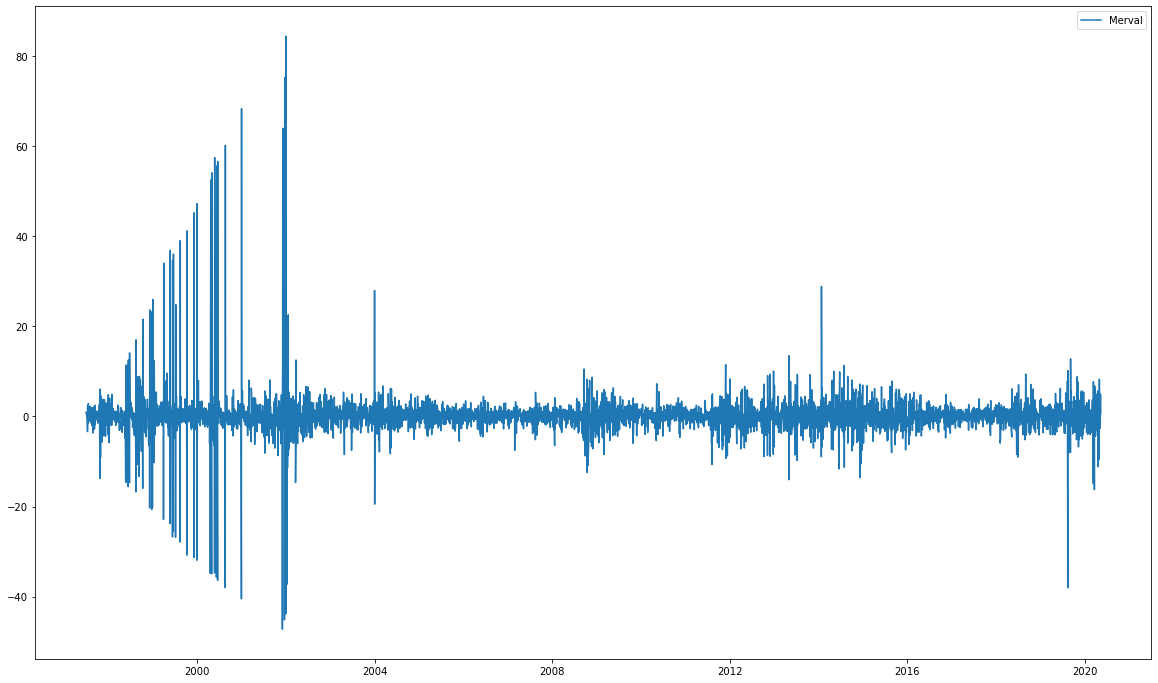

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
sb.lineplot(data = merval, label = "Merval")


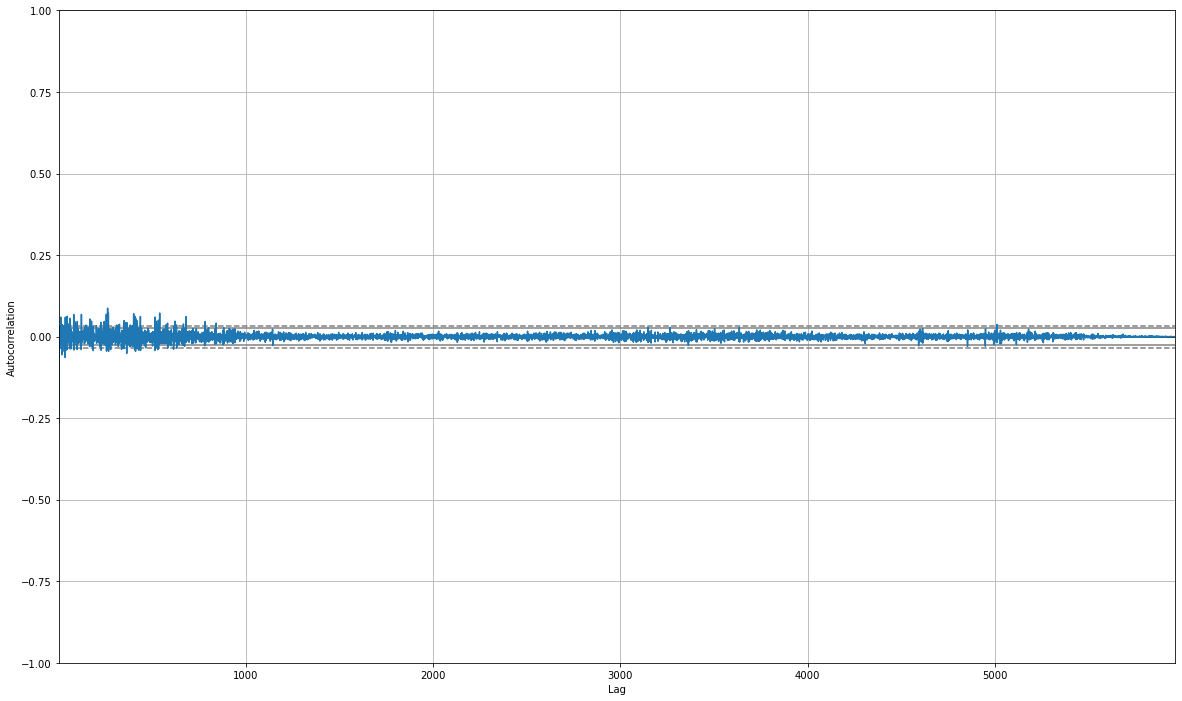

In [19]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(20,12))

autocorrelation_plot(merval)
pyplot.show()


Este correlograma es útil para saber cuál es el orden de autoregresión. Al estar trabajando con rendimientos, esperamos que no exista ningún patrón obvio de autocorrelación, ya que en caso de haberlo sería muy fácil obtener beneficios del mismo. 

### Entrenamiento del Modelo ARMA

Como no se desprende ningun orden de autocorrelación obvio visualizando el correlograma, se procede a entrenar primero un modelo ARMA lo más simple posible, esto es un ARMA(1,1)

C:\Users\Tomi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:            MERV_diario   No. Observations:                 5962
Model:                     ARMA(1, 1)   Log Likelihood              -17176.248
Method:                       css-mle   S.D. of innovations              4.315
Date:                Mon, 28 Sep 2020   AIC                          34360.495
Time:                        20:42:50   BIC                          34387.268
Sample:                    07-03-1997   HQIC                         34369.796
                         - 05-08-2020                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0804      0.037      2.178      0.029       0.008       0.153
ar.L1.MERV_diario     0.1288      0.042      3.036      0.002       0.046       0.212
ma.L1.MERV_diario    -0.

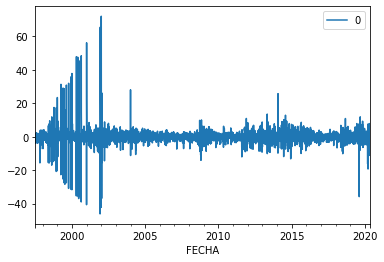

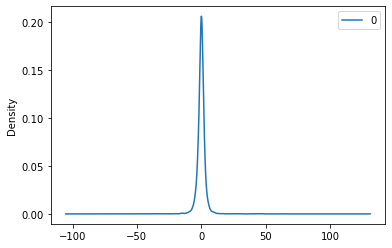

                 0
count  5962.000000
mean      0.000096
std       4.314973
min     -46.152607
25%      -1.202027
50%       0.046469
75%       1.235276
max      72.084392


In [20]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

model = ARIMA(merval, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

Los últimos dos gráficos representan los errores residuales del modelo en cada observación y su densidad, respectivamente. En el penúltimo gráfico confirmamos que los errores son un ruido blanco y que están centrados en cero, mientras que con el último gráfico podemos concluir también que además tienen una distribución normal o gaussiana. 

Cabe aclarar que aún no se ha realizado ninguna predicción, simplemente se ha implementado un modelo ARMA(1,1) sobre la totalidad de los datos disponibles. 

### Predicción con modelo ARMA

Finalmente llega el momento de hacer las predicciones, para ello se debe dividir el conjunto de datos en entrenamiento y test. El conjunto de entrenamiento se utilizará precisamente para entrenar el modelo y generar en base a ello una predicción para cada elemento del conjunto de test.

Se utilizará como conjunto de entrenamiento una "ventana expansiva" (llamada 'history') que comenzará teniendo el 66% de todos los datos disponibles: 3.934 observaciones. Con estas observaciones se correrá un modelo ARMA(1,1) que predecirá el valor de la observación 3.935. Luego, el verdadero valor de la observación 3.935 se incorporará al conjunto de entrenamiento (formando asi la ventana expansiva) y se utilizará este nuevo conjunto para predecir el valor de la observación 3.936, también con un modelo ARMA(1,1). El procedimiento se repetirá (es decir, se ejecutará un modelo ARMA para cada nueva observación que se reciba) hasta completarse el total del conjunto de datos disponibles. 


In [21]:
# Division en train y test

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

len(history), len(test)

(3934, 2028)

Test MSE: 8.529


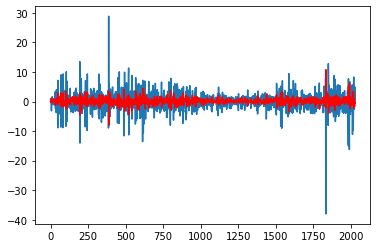

In [22]:
# Predicciones 

predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Ahora bien, para saber que tan bueno es el ECM de este modelo ARMA se lo va a comparar con el ECM de un modelo baseline dado por un Average Forecast. Pero para que ambos ECM sean comparables, los modelos deben estar haciendo predicciones sobre la misma cantidad de observaciones, por lo tanto a continuacion se presenta un Average Forecast sobre el mismo conjunto de test: las últimas 2.028 observaciones, utilizando como entrenamiento para cada una de ellas una 'ventana' de diferentes tamaños.

8.129322252652013


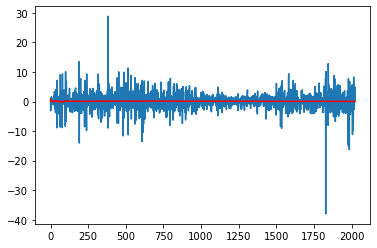

In [26]:
# Baseline Model: Average Forecast

window = 5
obs = len(test)

average_forecast = []
for i in range(window, obs):
    average_forecast.append((test[0:i].mean(), test[i:i+1]))
    
predicciones = np.array([pred for pred, _ in average_forecast])
reales = np.array([real for _, real in average_forecast])

# predicciones, reales = np.array(average_forecast)

Error_cuadratico = mean_squared_error(reales, predicciones)
print(Error_cuadratico)

# plot
pyplot.plot(reales)
pyplot.plot(predicciones, color='red')
pyplot.show()

El test ECM del ARMA(1,1) es de 8,52; mientras que el del modelo baseline es de 8,12. Esto quiere decir que el modelo ARMA(1,1) por mucho más complejo que sea relativo al Average Forecast, no es un mejor modelo predictivo de los rendimientos diarios. 

Al plotear el valor de las predicciones y el de los valores reales se puede ver que todas las predicciones que genera el Average Forecast son valores cercanos a cero, y surge la pregunta ¿Qué tan bueno sería un modelo predictivo que directamente arrojara como predicción para todas las observaciones el valor cero ?

Se hace la prueba a continuación:

8.09106376278621


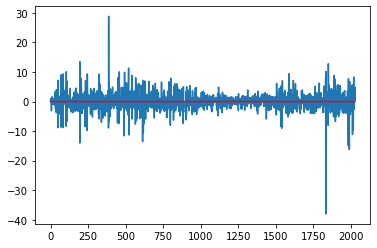

In [24]:
# Baseline Model 2: 'Predecir' todos ceros.

ceros = np.zeros(len(test))

ECM = mean_squared_error(test, ceros)
print(ECM)

pyplot.plot(test)
pyplot.plot(ceros, color='red')
pyplot.show()

En conclusión, un "modelo" que prediga que todos los rendimientos diarios serán iguales a cero es ligeramente mejor que el Average Forecast, el cual a su vez es mejor que un ARMA(1,1). 

Al considerar la naturaleza del problema al cual nos estamos enfrentando (predecir el rendimiento diario de un índice financiero), es entendible que lo mejor que se pueda hacer para predecir el rendimiento de dicha variable en un sólo dia sea decir que el mismo será nulo. 

## Baseline Prediction: Naïve Forecast sobre el log del índice

In [27]:
data

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN,Year,Month,Weekday
FECHA,,,,,,,,,,,,,,
1997-07-02,6.714504,9.418606,6.806863,6.883391,8.977220,8.375751,8.091117,5.172511,7.587500,4.970511,4.796275,1997,7,Wednesday
1997-07-03,6.723759,9.419469,6.821020,6.894184,9.006794,8.395939,8.102216,5.178089,7.572529,4.929226,4.794143,1997,7,Thursday
1997-07-04,6.731459,9.047596,6.819701,6.895324,9.038176,8.396646,8.100296,5.169943,7.553691,4.908267,4.787493,1997,7,Friday
1997-07-07,6.735612,9.435578,6.815859,6.898755,9.001550,8.410534,8.104428,5.164795,7.559571,4.881292,4.785874,1997,7,Monday
1997-07-08,6.741009,9.443040,6.823014,6.913548,8.991528,8.413088,8.094231,5.170894,7.554989,4.892927,4.789907,1997,7,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04,5.685041,9.557986,7.952524,9.086376,8.875144,9.342875,8.471311,5.214559,8.021481,6.008027,6.044615,2020,5,Monday
2020-05-05,5.720208,9.567136,7.961524,9.097241,8.893150,9.361406,8.488735,5.217838,8.032190,6.009077,6.036104,2020,5,Tuesday
2020-05-06,5.720279,9.541097,7.954520,9.103296,8.885674,9.345692,8.473415,5.222538,8.043570,6.004368,6.043240,2020,5,Wednesday


In [28]:
print(data.shape)
data.head(5)

(5963, 14)


,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN,Year,Month,Weekday
FECHA,,,,,,,,,,,,,,
1997-07-02,6.714504,9.418606,6.806863,6.883391,8.977220,8.375751,8.091117,5.172511,7.587500,4.970511,4.796275,1997,7,Wednesday
1997-07-03,6.723759,9.419469,6.821020,6.894184,9.006794,8.395939,8.102216,5.178089,7.572529,4.929226,4.794143,1997,7,Thursday
1997-07-04,6.731459,9.047596,6.819701,6.895324,9.038176,8.396646,8.100296,5.169943,7.553691,4.908267,4.787493,1997,7,Friday
1997-07-07,6.735612,9.435578,6.815859,6.898755,9.001550,8.410534,8.104428,5.164795,7.559571,4.881292,4.785874,1997,7,Monday
1997-07-08,6.741009,9.443040,6.823014,6.913548,8.991528,8.413088,8.094231,5.170894,7.554989,4.892927,4.789907,1997,7,Tuesday


In [29]:
data2 = data.iloc[0:5963,0]
print(len(data))
data2.head(5)

5963


FECHA
1997-07-02    6.714504
1997-07-03    6.723759
1997-07-04    6.731459
1997-07-07    6.735612
1997-07-08    6.741009
Name: MERV, dtype: float64

In [30]:
# Create lagged dataset

datos = data2.values

datos = DataFrame(datos)
dataframe = pandas.concat([datos.shift(1), datos], axis=1)
dataframe.columns = ['t-1', 't+1']
dataframe = dataframe.drop([0], axis=0) # elimino la primer fila porque contiene un NaN
print(dataframe.head(5))

        t-1       t+1
1  6.714504  6.723759
2  6.723759  6.731459
3  6.731459  6.735612
4  6.735612  6.741009
5  6.741009  6.740696


In [31]:
# Crear Naïve Forecast function

def naive_forecast(x):
    return x

In [32]:
# Aplicar el Naïve Forecast en los datos (con walk forward validation)

imput, real = dataframe['t-1'], dataframe['t+1']

predictions = list()
for x in imput:
    prediccion = naive_forecast(x)
    predictions.append(prediccion)
test_score = mean_squared_error(real, predictions)
print('Test MSE: %.5f' % test_score)


Test MSE: 0.00192


El modelo Naïve Bayes es increiblemente simple, de hecho gran parte de todas estas líneas de código se podrían haber ahorrado y directamente se podría haber calculado el Error Cuadrático Medio entre la columna 't-1' y la columna 't+1' del dataframe 'dataframe'. Esto queda demostrado en la siguiente celda:

In [33]:
Error_simple = mean_squared_error(dataframe['t+1'], dataframe['t-1'])

print(Error_simple)

0.0019249577601646807


## Modelo ARIMA sobre el log de la serie

Lo que se hace ahora es aplicar un Modelo ARIMA sobre el logaritmo de la serie del Merval. Se hace porque estamos interesados en saber si este modelo ARiMA es mejor que el modelo baseline que acabamos de aplicar, es decir, se quiere averiguar si un ARMA es un mejor modelo predictivo de los rendimientos diarios que un simple Naïve Bayes.

En este caso si se utiliza un proceso integrado (ARIMA y no ARMA), porque tal como se ve en el siguiente gráfico, al estar utilizando el logaritmo de la serie la misma no es estacionaria, por lo que deberemos aplicar diferencia sobre la misma para que se convierta en tal.  

<AxesSubplot:>

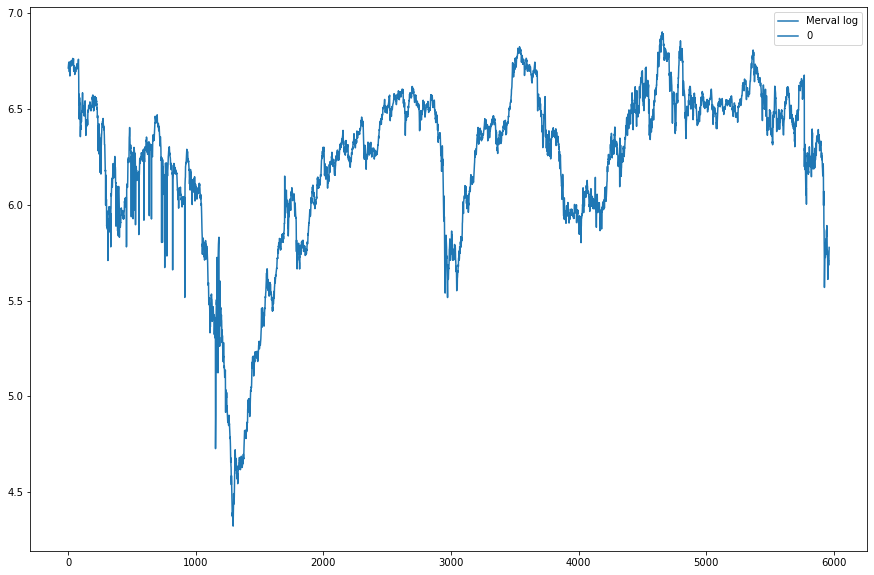

In [34]:
plt.figure(figsize=(15,10))

sb.lineplot(data = datos, label = 'Merval log')

### Entrenamiento del modelo ARIMA

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 5962
Model:                 ARIMA(1, 1, 1)   Log Likelihood               10487.872
Method:                       css-mle   S.D. of innovations              0.042
Date:                Mon, 28 Sep 2020   AIC                         -20967.743
Time:                        21:30:44   BIC                         -20940.970
Sample:                             1   HQIC                        -20958.443
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -0.487      0.626      -0.001       0.000
ar.L1.D.y      0.1645      0.038      4.312      0.000       0.090       0.239
ma.L1.D.y     -0.4898      0.034    -14.422      0.0

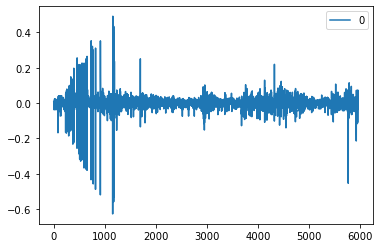

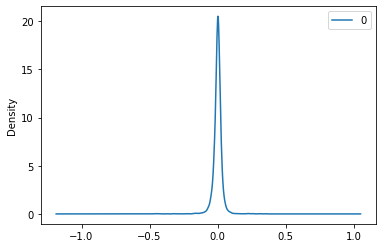

                 0
count  5962.000000
mean      0.000001
std       0.041670
min      -0.627109
25%      -0.010755
50%       0.002011
75%       0.013882
max       0.491196


In [35]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

datos =datos.values

model = ARIMA(datos, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

Hasta ahora solamente se probó el modelo ARIMA en el total de los datos disponibles, a continuación se utilizará para realizar predicciones. 

### Predicción con modelo ARIMA

In [36]:
# Division en train y test

size = int(len(datos) * 0.66)
train, test = datos[0:size], datos[size:len(X)]
history = [x for x in train]

len(history), len(test)

(3935, 2027)

Test MSE: 0.001


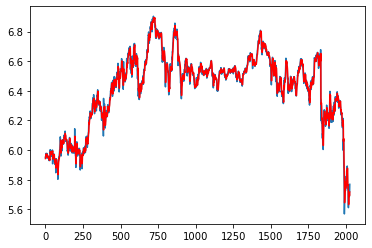

In [32]:
import warnings
warnings.filterwarnings("ignore")

predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

En el gráfico la línea azul (de observaciones reales) casi no se distingue, lo cual indica que el modelo predictivo ARIMA(1,1,1) está siguiente una 'regla' bastante parecida a la de un modelo Naïve Forecast: para cada observación t, predecir que la misma adoptará un valor muy parecido a la observacion inmediatamente anterior t-1. De hecho, el Error Cuadrático Medio del ARIMA(1,1,1) es casi idéntico al del Naïve Forecast aplicado sobre la totalidad de los datos. Veremos a continuación el ECM del Naïve Forecast aplicado sobre las mismas observaciones de test que el ARIMA. 

In [33]:
imput, real = dataframe['t-1'], dataframe['t+1']
imput, real = imput[size:len(imput)], real[size:len(real)]

predictions = list()
for x in imput:
    prediccion = naive_forecast(x)
    predictions.append(prediccion)
test_score = mean_squared_error(real, predictions)
print('Test MSE: %.5f' % test_score)


Test MSE: 0.00085


Entonces cuando comparamos la performance del modelo ARIMA(1,1,1) con un Naïve Bayes sobre el mismo conjunto de test, llegamos a la conclusion de que el Naïve es levemente mejor, lo cual coincide con lo que habíamos obtenido cuando comparamos el baseline y el ARMA(1,1) sober los rendimientos diarios.

En cualquier, o casi cualquier otro contexto, el hecho de que modelos complejos como ARMA y ARIMA no superen a modelos baseline simples como Average Forecast o Naïves Bayes sería, cuanto menos, decepcionante. Sin embargo, cuando consideramos el problema al cual nos estamos enfrentando, es decir, cuando nos detenemos a pensar que al fin y al cabo lo que estamos intentando de hacer es predecir las variaciones de un índice financiero, es entendible que no haya ningun modelo que tenga resultados demasiados prometedores. 

Esto es porque en caso de que dicho modelo exista, traeria consigo la posibilidad de obtener grandes beneficios en el mercado, y todos los agentes comenzarían a usarlo.

Es por eso que no se puede definir a un modelo como "bueno" o "malo" sin considerar también la finalidad para la cual el modelo está siendo aplicado. Esto significa que si bien es cierto que ninguno de los modelos implementados en este trabajo superó a los modelos baseline, no podríamos clasificarlos como malos cuando en realidad no existe ningun otro modelo, por más complejo que sea, que consistemente acierte la dirección de los movimientos de la bolsa. Lo más que podemos decir, es asegurar que un modelo ARIMA o ARMA no es útil para hacerse millonario. 

## Búsqueda de parámetros para el modelo ARIMA

Los resultados recientemente obtenidos dependen de los valores que le pasamos al modelo ARIMA. Particularmente, sólo se entreno y se predijo un sólo modelo ARIMA que tenía un orden de autocorrleación y de media móvil iguales a 1 (p=1 y q=1). Si cambiamos los parámetros del modelo, se obtendrán diferentes predicciones y por ende se llegará a un error cuadrático distinto, el cual puede ser mejor o peor que el ya obtenido.

Lo que se hace a continuación es definir una serie de diferentes valores para los parámetros del modelo ARIMA y calcular el Error cuadrático del modelo con cada una de las combinaciones posibles. Esto sirve para determinar si hay algun grado de autocorrelación o de medias móviles para los cuales el modelo ARIMA sea definitivamente un mejor modelo predictivo que el baseline. 

In [37]:
# aca en el primer argumento tengo que poner 'datos' y en el segundo tengo que crear el vector y ponerlo

def evaluate_arima_model(X, arima_order):  
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [35]:

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.5f' % (best_cfg, best_score))
    

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for q in q_values:
            order = (p,1,q)
            try:
                mse = evaluate_arima_model(dataset, order)
                if mse < best_score:
                    best_score, best_cfg = mse, order
                print('ARIMA%s MSE=%.5f' % (order,mse))
            except:
                continue
    print('Best ARIMA%s MSE=%.5f' % (best_cfg, best_score))

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# evaluate parameters
p_values = [1, 5, 10, 15]
d_values = [1, 1, 1]
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(datos, p_values, d_values, q_values)

ARIMA(1, 1, 0) MSE=0.001
ARIMA(1, 1, 1) MSE=0.001
ARIMA(1, 1, 2) MSE=0.001
ARIMA(5, 1, 0) MSE=0.001
